# Telco Customer Churn

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import linregress

In [2]:
# Study data files
TELCO_PATH = "Resources/Telco_Customer_Churn_copydataset.csv"

In [3]:
# Read the Telco data and the study results
telco_data = pd.read_csv(TELCO_PATH)

## Telco dataset

In [4]:
telco_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## About Dataset

 The data set includes information about:

- Customers who left within the last month – the column is called Churn.
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

In [5]:
telco_data.shape

(7043, 21)

####  In the telco_data set we have 7043 rows(data points) and 21 columns.

In [6]:
telco_data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

### Dataset quick Analysis

With the nunique() function,we are able to determine the number of unique values in each column of the telco DataFrame.  Here we find that there are 7,043 data points in the telco_data set each unique customer id representing a seperate data point.In the 'gender' column we have 2 values, they are male and female. In the 'Senior Citizen' column we have also 2 values, i.e, 0 & 1 , which means senior citizen for 1 and not senior citizen for 0. In the 'Partner' column also we have 2 columns,'Yes' (have parnter)and 'No' they don't have partner. Likewise, 'Dependents' column have also 2 values,i.e,'Yes' and 'No'. 'Tenure' column which signifies the number of months the customer has stayed with the company, has numerical values.'Phone service' has 2 values as well, "Yes" and "No". Likewise, 'Multiple lines','Internet Service','On line Security', 'Device protection', 'Tech Support','Streaming Tv', &'Streaming Movie' all columns contains all 3 values 'Yes', 'No' & 'No internet Service respectively.'Contract' column contains 3 values, they are, month-to-month, one-year, and two-year. 'Paperless Billing' contains 2 values,i.e, 'Yes' or 'No'.Likewise, there are 4 values in the 'Payment Method' column, they are, 'Electronic check', 'Mailed check', 'Bank transfer (automatic), and 'Credit Card'. 'Monthly Charges' column also has numerical value. Whereas Total Total charges has numerical values but is listed as object type which we will soon convert into numerical data type for proper data analysis. And finally 'Churn' which has our primary focus and here considered as dependant variable has two value, i.e, 'Yes' or 'No'. 

In [7]:
#checking data types of the columns
telco_data.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
## extracting categorical columns, by comparing with respect to object dataype
# categorical and numerical columns
categorical_columns =[each for each in telco_data.columns if telco_data[each].dtype=="object"] 
# convert list to set, to extract unique elements
numerical_columns = list(set(telco_data.columns) - set(categorical_columns) - {"customerID"}) 

In [9]:
numerical_columns

['SeniorCitizen', 'MonthlyCharges', 'tenure']

In [10]:
categorical_columns

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

### Analysis

Here, we find that `Senior Citizen, tenure and Monthly Charges` are the only columns which are numerical here,however there are other columns such as, `Total charges` which is currently listed as object type, as data value also contains string values.Hence,for proper analysis, we should convert the `Total charges` series into to a numerical type (like float) . 

In [11]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Exploratory Data Analysis

Here we can see in the above dataframe that there are no null-values in the data set.Hence we are ready to do the explorative data analysis.

In this telco dataset, basically we are trying to predict customers behavior to retain them in the business. Hence we will try to explore what are the factors or independent variables those are converting our churn variable which is our dependent variable . In other words, we are basically trying to figure out what are the factors those may be responsible for the customers to leave the business.
Below I have tried to analyze churning behavior of the customer in terms of some of the relevant factors that may have affected the churning behavior of the overall customers. 

In [12]:
#calculating Average monthly charges of the services
avg_monthly_chrg = telco_data["MonthlyCharges"].mean()
avg_monthly_chrg

64.76169246059918

In [13]:
#creating churn dataframe
churn_df = pd.DataFrame(telco_data["Churn"])
churn_df

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [14]:
#converting churn column into numeric and adding another column for it
telco_data['churn_numeric'] = telco_data['Churn'].map({'Yes': 1, 'No': 0})

# Now, 'Churn_numeric' is a numeric column with 1 representing 'Yes' and 0 representing 'No'.


### Analysis:

By using the above panda code we are mapping the 'Churn' column to a new column 'churn_numeric' with binary values.This will create a new column in our telco_data DataFrame where the 'Yes' values in the 'Churn' column are replaced by 1, and the 'No' values are replaced by 0, so now we can use this new numeric column for any further analysis.

In [15]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn_numeric
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


# Data Analysis of churning behavior of customers using some relevant factors

## 1 . Monthly Charges

<Figure size 700x500 with 0 Axes>

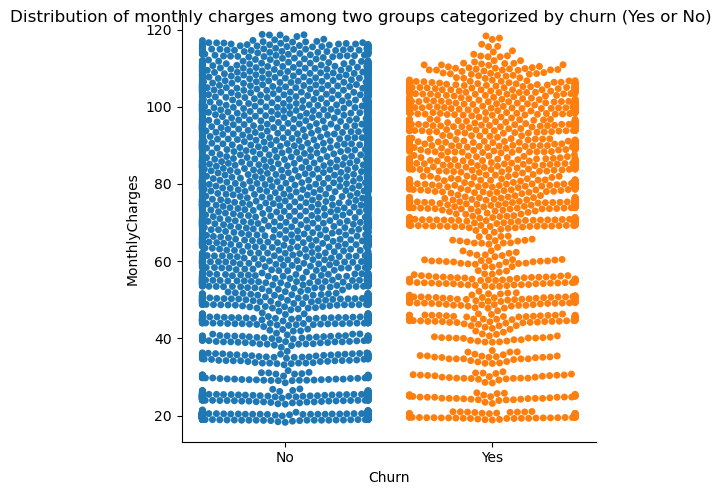

In [16]:
#Creating  beeswarm plots  using catplot of seaborn to visualize the distribution of monthly charges among two groups categorized by churn (Yes or No):
fig1 = plt.figure(figsize=(7, 5))
g = sns.catplot(data=telco_data, x="Churn", y="MonthlyCharges", hue= "Churn", kind ="swarm")
g.fig.suptitle("Distribution of monthly charges among two groups categorized by churn (Yes or No)")

#saving the figure to local repository
g.savefig("../Project-1/Output/fig1.png")
plt.show()

### Graphical Analysis

- Based on the bee swarm plots above, we can see that both categories have a substantial number of data points, indicating variability in monthly charges among both categories of customers.
- Yes' category (customers who have churned) is more spread out with a significant portion of data points at the higher end of the monthly charges. The 'Yes' churn group has a broader distribution, indicating a wider variation of monthly charges among churned customers, and possibly a correlation between higher charges and the likelihood to churn.
- On the other hand, The 'No' churn group shows a high density of points tightly distributed approximately in the $50 -$110 range, indicating that most customers who didnt not churn pay a monthly charge within that range. This implies a potential threshold range for monthly charges that could be associated with customer retention.
- Based on this output, the company might consider investigating further into what additional factors contribute to churn, especially for those customers paying higher monthly charges. 



(0.0, 1200.0)

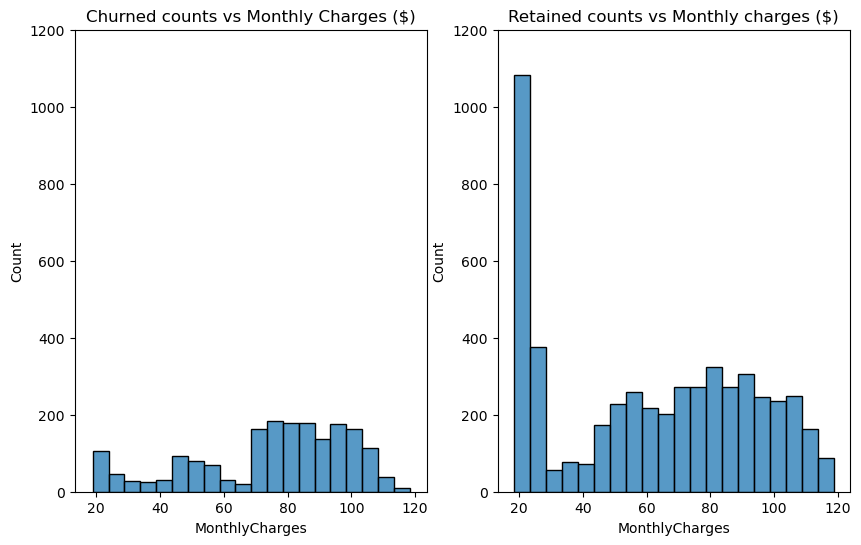

In [17]:
## Distribution of Monthly Charges by Churn Status
fig2, (ax1, ax2) = plt.subplots(1, 2, sharex=True,figsize=(10, 6))
sns.histplot(telco_data[telco_data.Churn=="Yes"]["MonthlyCharges"], bins=20, ax=ax1)
sns.histplot(telco_data[telco_data.Churn=="No"]["MonthlyCharges"], bins=20,ax=ax2)
ax1.set_title("Churned counts vs Monthly Charges ($)")
ax2.set_title("Retained counts vs Monthly charges ($)")
ax1.set_ylim(0,1200)
ax2.set_ylim(0,1200)


In [18]:
print(f"""Mean of monthly charges for churned customer >> {telco_data[telco_data.Churn=="Yes"]["MonthlyCharges"].mean()}
and Mean of monthly charges for retained customer >> {telco_data[telco_data.Churn=="No"]["MonthlyCharges"].mean()}""")

#saving the figure to local repository
fig2.savefig("../Project-1/Output/fig2.png")

Mean of monthly charges for churned customer >> 74.44133226324237
and Mean of monthly charges for retained customer >> 61.26512369540008


### Graphical Analysis

- Based on the histogram visualization, after comparing the distribution of monthly charges for churned vs. retained customers, we find that he distribution of monthly charges for churned customers is shifted towards higher values compared to retained customers.Besides the histograms, difference between the mean monthly charges for the two groups, `(churned)$74.44 > $61.27(Retained)` also suggests that. This indicates churned customers tend to have higher monthly charges on average.
- Also, we can see that most customers who churned have the monthly charges between approx.` $ 70-$ 80`, whereas most retained customers are between the monthly charges of `$ 15-$ 30` which we can see by the tallest bar in the second chart.These peak frequencies for each customer group, churned and retained group allow us to visually see the typical or most common monthly charges value for each customer group.In summary, we can say that churned customers tend to have higher monthly charges on average than retained customers, which makes sense as many customers may have prefered the lower monthly charges and decided to retain their service and as the monthly charges rate goes higher, retention rate also significantly fell down suggesting less customers are being retained at higher monthly charges.

In [19]:
#calculating median of churned and retained customers
print(f"""Median of monthly charges for churned customer >> {telco_data[telco_data.Churn=="Yes"]["MonthlyCharges"].median()}
and Median of monthly charges for retained customer >> {telco_data[telco_data.Churn=="No"]["MonthlyCharges"].median()}""")


Median of monthly charges for churned customer >> 79.65
and Median of monthly charges for retained customer >> 64.42500000000001


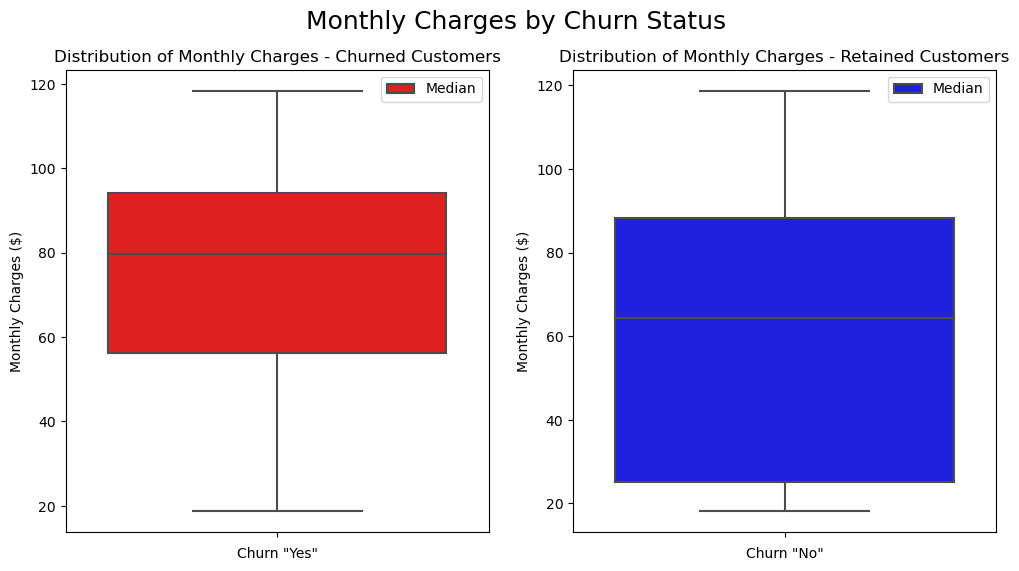

In [20]:
#creating boxplots of churned and retained customers 
fig3, (ax1, ax2) = plt.subplots(1, 2, sharex=True,figsize=(12, 6))
# For churned customers
sns.boxplot(telco_data[telco_data["Churn"] == "Yes"], y="MonthlyCharges", color='red', ax=ax1)

# For retained customers
sns.boxplot(telco_data[telco_data["Churn"] == "No"], y="MonthlyCharges", color='blue', ax=ax2)
ax1.set_title("Distribution of Monthly Charges - Churned Customers")
ax2.set_title("Distribution of Monthly Charges - Retained Customers")
ax1.set_xlabel('Churn "Yes"')
ax1.set_ylabel('Monthly Charges ($)')
ax2.set_xlabel('Churn "No"')
ax2.set_ylabel('Monthly Charges ($)')
fig3.suptitle('Monthly Charges by Churn Status', fontsize=18)
ax1.legend(["Median"]) 
ax2.legend(["Median"])

#saving the figure to local repository
fig3.savefig("../Project-1/Output/fig3.png")

In [21]:
#Finding statistical numbers of customers who churned with respect to Monthly charges
telco_data[telco_data.Churn=="Yes"]["MonthlyCharges"].describe()


count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: MonthlyCharges, dtype: float64

In [22]:
##Finding statistical numbers of customers who churned with respect to Monthly charges
telco_data[telco_data.Churn=="No"]["MonthlyCharges"].describe()

count    5174.000000
mean       61.265124
std        31.092648
min        18.250000
25%        25.100000
50%        64.425000
75%        88.400000
max       118.750000
Name: MonthlyCharges, dtype: float64

### Graphical analysis

- The median monthly charge is higher for churned customers `($79.65)` compared to retained customers `($64.43)`. This reinforces the idea that higher monthly costs are associated with increased churn risk.
- Whereas the lower median monthly charge for retained customers than churned customers, suggests that **lower monthly charges could be associated with customer retention**.
- Also ,there are **no evident outliers** in both groups, churned and retained customers , which suggests that both churned and retained customers' monthly charges are fairly consistent within the observed range.
- These observations could provide valuable insights into how pricing strategies might affect customer churn and retention. A business could look into further analyzing these trends to develop targeted customer retention strategies based on pricing models.
- With the boxplots above, we can observe that The IQR for retained customers is greater than the IQR for churned customers, which indicates there is more variability in the monthly charges for retained customers compared to churned customers.With a smaller IQR, we can say that monthly charges for churned customers are more concentrated around the median value. Whereas,for retained customers, the monthly charges are more spread out over a wider range between Q1 and Q3, as evidenced by the larger IQR. 
- In summary, more variability in the monthly charges of retained customers suggests regarding pricing flexibility and customization helps retain customers across diverse price points and tolerance levels.**This could indicate the company's pricing and discounts are working well to retain customers across varying price points - from low to high monthly charges.Offering a wide range of customized plans and promotions may allow the company to appeal to and retain customers with diverse needs.**





In [23]:
telco_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn_numeric
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [24]:
# Calculate the correlation coefficient between 'MonthlyCharges' and 'Churn_numeric'
cor_monthly_churn = telco_data['MonthlyCharges'].corr(telco_data['churn_numeric'])
cor_monthly_churn

0.19335642223784671

### Analysis

In order to measure and understand the strength and direction of the linear relationship between "Churn" and "Monthly charges", we should calculate correlation coefficient of the two variables.

Given the **correlation coefficient of approximately 0.193, this indicates a weak positive relationship between 'MonthlyCharges' and 'churn_numeric'** in the dataset. This suggests that higher monthly charges might be slightly associated with a greater likelihood of churn, but the relationship is not strong. It is also important to note that **correlation does not imply causation**, and other factors could be influencing the churn rate. Additionally, the value is low enough that it would not be considered a strong predictor without further analysis and possibly additional data to support the finding.






## 2. Gender

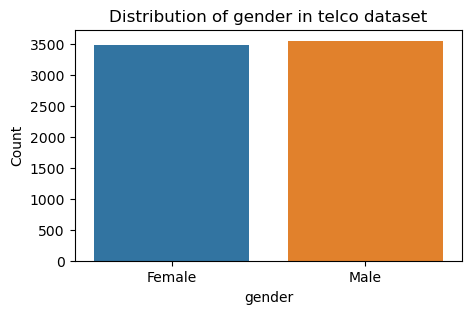

In [25]:
# Distribution of both gender in telco dataset
plt.figure(figsize=(5,3))
telco_gender = sns.countplot(data=telco_data, x= "gender")
plt.xlabel('gender')
plt.ylabel('Count')
plt.title("Distribution of gender in telco dataset")
# Saving the figure. Specifing the desired file path and name.
plt.savefig('../Project-1/Output/fig4.png')

# Show the plot
plt.show()


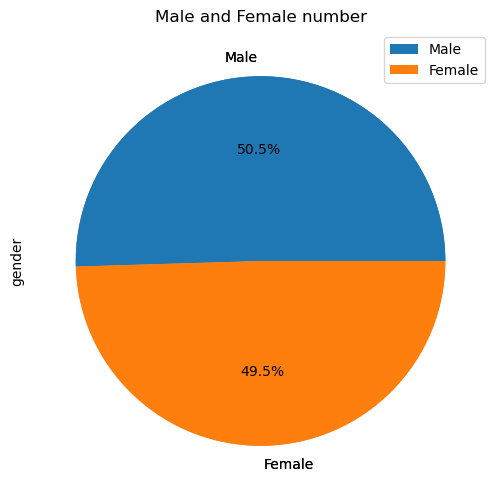

In [26]:
#Finding the male and female percentages in a gender column
male_female_num= telco_data["gender"].value_counts()
male_female_num

male_female_num.plot(kind="pie",autopct='%1.1f%%', figsize=(6, 6))

# Add a title
plt.title('Male and Female number')
plt.ylabel("gender")
labels = male_female_num.index
plt.pie(male_female_num,labels=labels)
plt.legend(labels,loc="best")

#Saving the figure. Specifing the desired file path and name.
plt.savefig('../Project-1/Output/fig5.png')

plt.show()

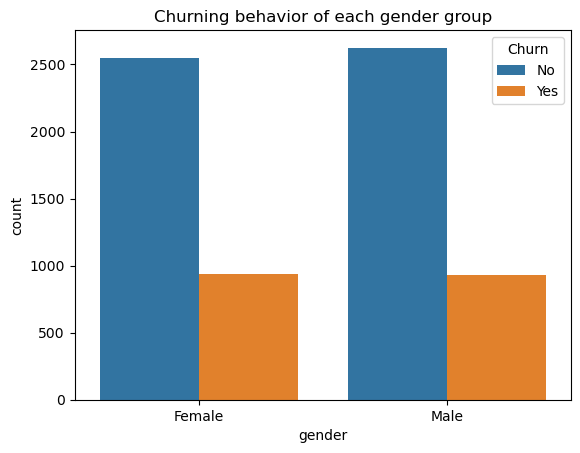

In [27]:
# Creating count plot using seaborn to understand the churning behavior of each gender group
gender_churn= pd.crosstab(telco_data["gender"], telco_data["Churn"])
sns.countplot(x='gender', hue='Churn', data=telco_data)
plt.title("Churning behavior of each gender group")
#Saving the figure. Specifing the desired file path and name.
plt.savefig('../Project-1/Output/fig6.png')

#Show the plot
plt.show()

In [28]:
gender_churn

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


gender
Female    0.269209
Male      0.261603
Name: churn_numeric, dtype: float64


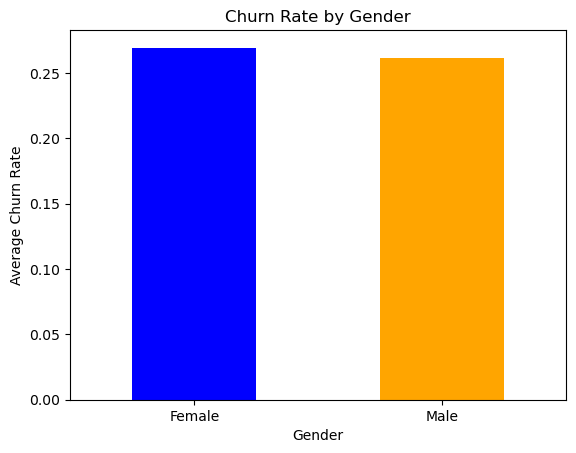

In [29]:
# Grouping by 'gender' and calculating mean churn rate for each gender
gender_churn_rate = telco_data.groupby('gender')['churn_numeric'].mean()

# Plotting the churn rate by gender
gender_churn_rate.plot(kind='bar', color=['blue', 'orange'])
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Churn Rate')
plt.xticks(rotation=0)  # Keeping the gender labels horizontal for readability

print(gender_churn_rate)   
# Saving the figure. Specifing the desired file path and name.
plt.savefig('../Project-1/Output/fig7.png')

# Show the plot
plt.show()

                              

### Analysis

- Here we found that 50.5% are male and 49.5% are female in the dataset, which is almost the same count of both genders and out of all those genders participating in this data study, we found that the churn rate for female and male is  `0.27(approx.) and 0.26 (approx)` respectively  which is 27% for female and 26% for male, suggesting that the churn rate for both genders is almost identical which can be visualized by the both bars which are relatively close in height.
- It indicates that **gender might not be a strong standalone predictor of churn in this instance**, given the similarity in the rates. However, it's always important to consider other factors and conduct a more in-depth analysis to understand the underlying causes of churn fully.

## 3. Streaming TV Services

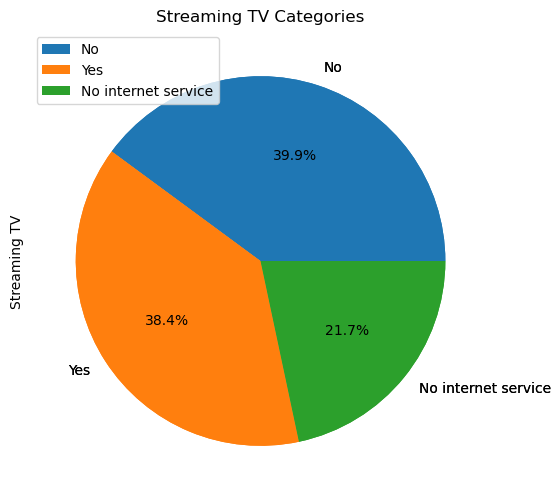

In [30]:
#Finding the percentages of all the three categories of streaming TV service.
streaming_Percentage = telco_data["StreamingTV"].value_counts()
streaming_Percentage

streaming_Percentage.plot(kind="pie",autopct='%1.1f%%', figsize=(6, 6))

# Add a title
plt.title('Streaming TV Categories')
plt.ylabel("Streaming TV")
labels = streaming_Percentage.index
plt.pie(streaming_Percentage,labels=labels)
plt.legend(labels,loc="upper left")

#Saving the figure. Specifing the desired file path and name.
plt.savefig('../Project-1/Output/fig8.png')

plt.show()

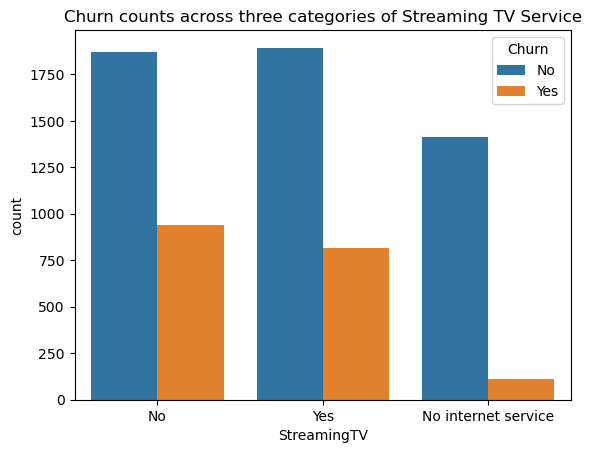

In [31]:
#Distribution of churn across the three categories of streaming TV service
streaming_churn= pd.crosstab(telco_data["StreamingTV"], telco_data["Churn"])
sns.countplot(x='StreamingTV', hue='Churn', data=telco_data)
plt.title("Churn counts across three categories of Streaming TV Service")

# Saving the figure. Specifing the desired file path and name.
plt.savefig('../Project-1/Output/fig9.png')

# Show the plot
plt.show()


In [32]:
streaming_churn

Churn,No,Yes
StreamingTV,,
No,1868,942
No internet service,1413,113
Yes,1893,814


In [33]:
#calculating the percentage of customers who churned (Yes) out of the total customers for each category in the streaming_churn DataFrame.
print(streaming_churn["Yes"] / streaming_churn.sum(axis=1) * 100)

StreamingTV
No                     33.523132
No internet service     7.404980
Yes                    30.070188
dtype: float64


### Analysis

- Here we found that people who have  Streaming Tv services and who dont have Streaming Tv services are almost of same amount, which is 38.4% and  39.9% for both respectively.
- Also there are more customers **without Streaming TV who churned (942)** compared to those **with Streaming TV (814)** who churned. But in terms of percentages, the rate is only **33.52** % for customers **without Streaming Tv** who churned, and  **30%** of customers **with Streaming Tv** who churned.This tells us that having having Streaming TV corresponds to a small decrease in churn percentage.Likwise, 21.7 % out of all ,are the people without internet service, but very few of them churned (113 out of 1526) , i.e, 7.40%, suggesting Lack of internet appears connected to lower churn rates. This makes sense as these customers with no internet service who didnt churn and are retained as customers may be the one who only uses the tele communication services for phone lines only.  

## 4. Contract

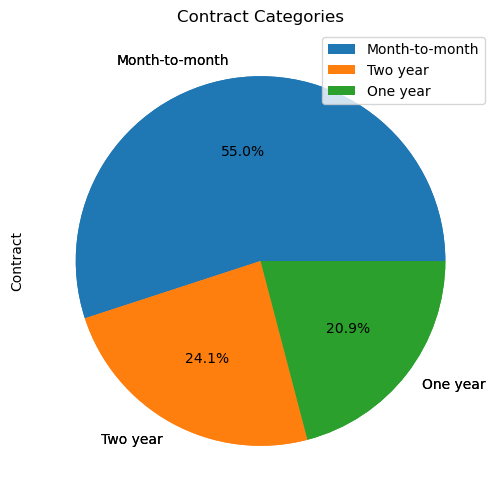

In [34]:
#Finding the percentages of all the three categories of Contract column.
contract_percentage = telco_data["Contract"].value_counts()
contract_percentage

contract_percentage.plot(kind="pie",autopct='%1.1f%%', figsize=(6, 6))

# Add a title
plt.title('Contract Categories')
plt.ylabel("Contract")
labels = contract_percentage.index
plt.pie(contract_percentage,labels=labels)
plt.legend(labels,loc="upper right")

#Saving the figure. Specifing the desired file path and name.
plt.savefig('../Project-1/Output/fig10.png')

plt.show()

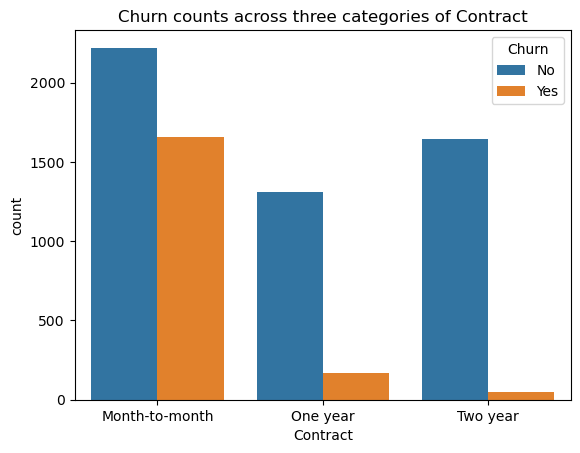

In [35]:
#Distribution of churn across the all three categories of Contract.
contract_churn= pd.crosstab(telco_data["Contract"], telco_data["Churn"])
sns.countplot(x='Contract', hue='Churn', data=telco_data)
plt.title("Churn counts across three categories of Contract")

# Saving the figure. Specifing the desired file path and name.
plt.savefig('../Project-1/Output/fig11.png')

# Show the plot
plt.show()


In [36]:
contract_churn

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [37]:
#calculating the percentage of customers who churned (Yes) out of the total customers for each category in the contract_Churn DataFrame.
print(contract_churn["Yes"] / contract_churn.sum(axis=1) * 100)

Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
dtype: float64


### Analysis

- 55% out of all customers in the contract variable has month-to-month contract, wheras customers having one year and two year contract are 20.9% and 24.1% out of all customers counts.
- Here we see that customers with a **month-to-month contract have the highest churn rate**. Approximately `42.71%` of customers with a **month-to-month contract have churned**. Whereas customers with **longer contracts (one year and two years)** have significantly **lower churn rates**, with the two-year contract holders being the least likely to churn(2.83%).
- Highest month-to-month churn rate could reflect a commitment level or satisfaction with the service.
- Other reasons why month to month contract has the highest churn could be, such as unaffordability of services for longer period, end of promotions and trial periods, life changes etc.


## 5. Internet Services

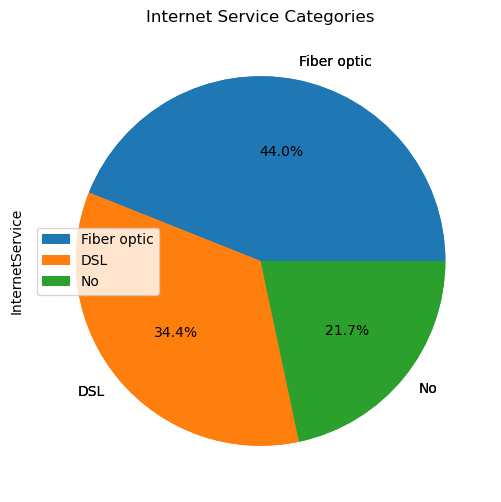

In [38]:
#Finding the percentages of all the three categories of Internet Service column.
int_ser_percentage = telco_data["InternetService"].value_counts()
int_ser_percentage
int_ser_percentage.plot(kind="pie",autopct='%1.1f%%', figsize=(6, 6))

# Add a title
plt.title('Internet Service Categories')
plt.ylabel("InternetService")
labels = int_ser_percentage.index
plt.pie(int_ser_percentage,labels=labels)
plt.legend(labels,loc="center left")

#Saving the figure. Specifing the desired file path and name.
plt.savefig('../Project-1/Output/fig12.png')

plt.show()

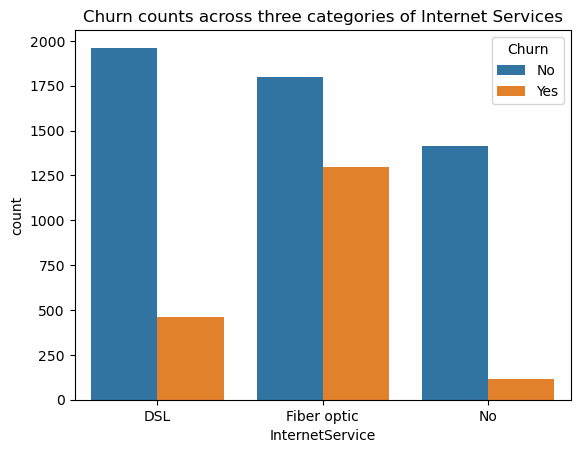

In [39]:
##Distribution of churn across the all three categories of Internet Services.
internet_service_churn= pd.crosstab(telco_data["InternetService"], telco_data["Churn"])
sns.countplot(x='InternetService', hue='Churn', data=telco_data)
plt.title("Churn counts across three categories of Internet Services")
# Saving the figure. Specifing the desired file path and name.
plt.savefig('../Project-1/Output/fig13.png')

# Show the plot
plt.show()

In [40]:
internet_service_churn

Churn,No,Yes
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


In [41]:
##calculating the percentage of customers who churned (Yes) out of the total customers for each category in the internet_service_churn DataFrame.
print(internet_service_churn["Yes"] / internet_service_churn.sum(axis=1) * 100)

InternetService
DSL            18.959108
Fiber optic    41.892765
No              7.404980
dtype: float64


### Analysis

- Here we see that most customers (40%) have Fiber Optic as their main Internet Services, whereas the second most used internet service is DSL and remaining 21.7% has no internet service at all.
- It is also important to note here that it is also Fiber Optic which has the most churn rate,i.e, 42% which is 1297 counts of churns out of 3096 total Fiber optic customers.
- Customers with No internet service have the lowest churn rate at only 7% ,which is 113 counts of churns out of 1526 customers with no internet service.
- This suggests issues around fiber optic services driving churn, or customers getting fiber, expecting faster speeds but being disappointed.The provider could focus on improving fiber optic performance and customer satisfaction to reduce the high churn.
- Overall, internet service type seems correlated with likelihood to churn. Improving fiber optic satisfaction and analyzing the root causes of dissatisfaction among fiber optic customers could reveal ways to improve retention.**

In [42]:
telco_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn_numeric
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


## 6. Senior Citizens Status

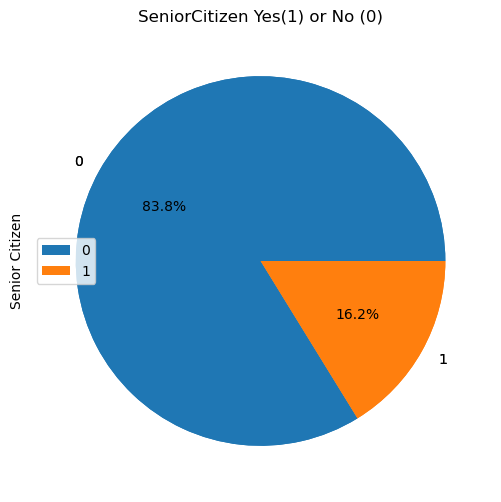

In [43]:
#Finding the percentages of Senior citizens in the senior citizens columns
senior__churn_percentage = telco_data["SeniorCitizen"].value_counts()
senior__churn_percentage
senior__churn_percentage.plot(kind="pie",autopct='%1.1f%%', figsize=(6, 6))

# Add a title
plt.title('SeniorCitizen Yes(1) or No (0)')
plt.ylabel("Senior Citizen")
labels = senior__churn_percentage.index
plt.pie(senior__churn_percentage,labels=labels)
plt.legend(labels,loc="center left")

#Saving the figure. Specifing the desired file path and name.
plt.savefig('../Project-1/Output/fig14.png')

plt.show()

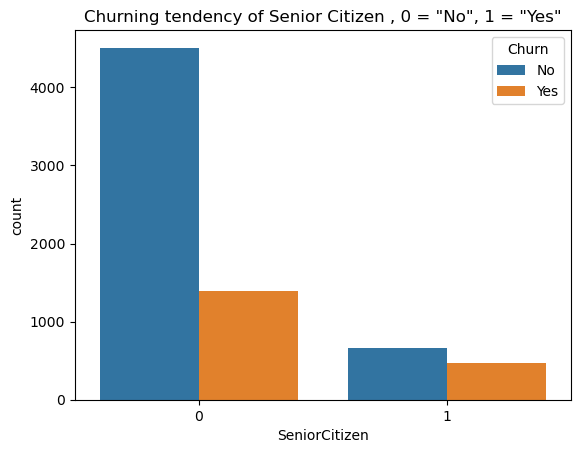

In [44]:
##Distribution of churn in respect to being Senior Citizen
Senior_churn= pd.crosstab(telco_data["SeniorCitizen"], telco_data["Churn"])
sns.countplot(x='SeniorCitizen', hue='Churn', data=telco_data)
plt.title('Churning tendency of Senior Citizen , 0 = "No", 1 = "Yes"')

# Saving the figure. Specifing the desired file path and name.
plt.savefig('../Project-1/Output/fig15.png')

# Show the plot
plt.show()

In [45]:
Senior_churn

Churn,No,Yes
SeniorCitizen,,
0,4508,1393
1,666,476


In [46]:
##calculating the percentage of customers who churned (Yes) out of the total customers for each category in the senior_churn DataFrame.
print(Senior_churn["Yes"] / Senior_churn.sum(axis=1) * 100)

SeniorCitizen
0    23.606168
1    41.681261
dtype: float64


In [47]:
# Calculating the correlation coefficient between 'SeniorCitizen' and 'Churn_numeric'
cor_Senior_churn = telco_data['SeniorCitizen'].corr(telco_data['churn_numeric'])
cor_Senior_churn

0.15088932817647335

### Analysis

- Non-seniors (under 65 years old) are in lot more counts in the churning side of the dataset, however; Senior citizens (65+ years old) are notably churning at a higher rate (41.68%) than non-senior citizens (23.61%). The churn rate is almost double for senior citizens versus non-seniors even though seniors are only 16.2% of the total customers in the dataset.
- The smaller number of senior citizens in the dataset could mean we didn’t collect enough data from the senior citizen population, while their higher churning rate suggests that they may need additional retention efforts, special offers, or customized service to reduce their churn rate.
-  However, the value of (approx.) 0.15 of the correlation coefficient indicates a weak but positive correlation between being a senior citizen and churning, suggesting that there are other factors that may be more responsible for the customers' churning behavior.


## 7. Tenure

In [48]:
# Calculating the correlation coefficient between 'Tenure' and 'Churn_numeric'
cor_tenure_churn = telco_data['tenure'].corr(telco_data['churn_numeric'])
cor_tenure_churn

-0.35222867011307707

### Analysis

- As expected, there is a moderately negative correlation between customer tenure and churn, which basically means longer-tenured customers are less prone to churn, while newer customers have higher churn rates.
- This aligns with common knowledge in many subscription businesses - newer customers are more prone to churn before they establish loyalty.

## 8. Total Charges

In [49]:
#checking data type of total charges
telco_data["TotalCharges"].dtype

dtype('O')

In [50]:
#Confirming all the numerical columns
numerical_columns

['SeniorCitizen', 'MonthlyCharges', 'tenure']

In [51]:
# convert the 'TotalCharges' column to a numerical data type 
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'], errors='coerce')

In [52]:
##checking data type of total charges again
telco_data["TotalCharges"].dtype

dtype('float64')

In [53]:
#Finding statistical numbers of customers who churned with respect to Totalcharges
telco_data[telco_data.Churn=="Yes"]["TotalCharges"].describe()


count    1869.000000
mean     1531.796094
std      1890.822994
min        18.850000
25%       134.500000
50%       703.550000
75%      2331.300000
max      8684.800000
Name: TotalCharges, dtype: float64

In [54]:
#Finding statistical numbers of customers who didnt churn with respect to Totalcharges
telco_data[telco_data.Churn=="No"]["TotalCharges"].describe()


count    5163.000000
mean     2555.344141
std      2329.456984
min        18.800000
25%       577.825000
50%      1683.600000
75%      4264.125000
max      8672.450000
Name: TotalCharges, dtype: float64

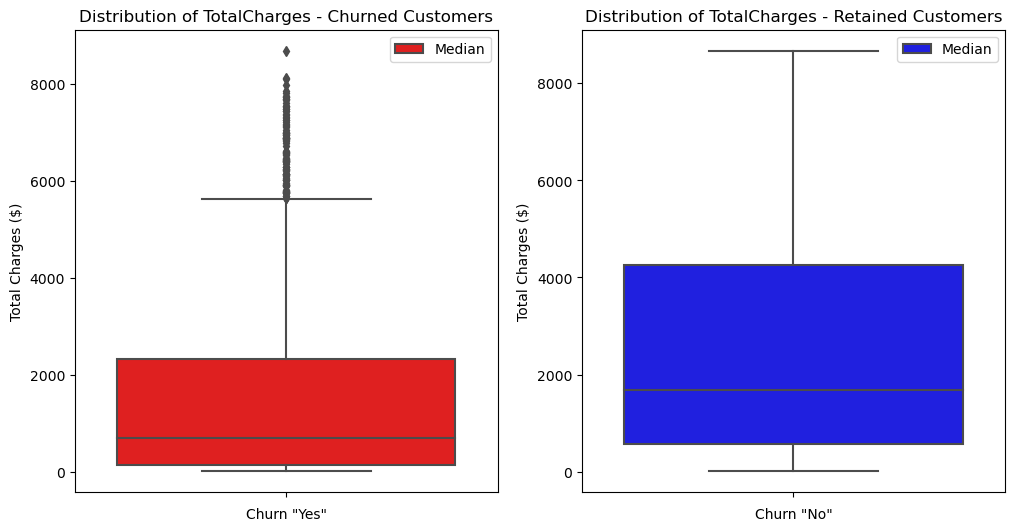

In [55]:
#creating boxplots of churned and retained customers 
fig16, (ax1, ax2) = plt.subplots(1, 2, sharex=True,figsize=(12, 6))
# For churned customers
sns.boxplot(telco_data[telco_data["Churn"] == "Yes"], y="TotalCharges", color='red', ax=ax1)

# For retained customers
sns.boxplot(telco_data[telco_data["Churn"] == "No"], y="TotalCharges", color='blue', ax=ax2)
ax1.set_title("Distribution of TotalCharges - Churned Customers")
ax2.set_title("Distribution of TotalCharges - Retained Customers")
ax1.set_xlabel('Churn "Yes"')
ax1.set_ylabel('Total Charges ($)')
ax2.set_xlabel('Churn "No"')
ax2.set_ylabel('Total Charges ($)')
fig3.suptitle('Total Charges by Churn Status', fontsize=18)
ax1.legend(["Median"]) 
ax2.legend(["Median"])

#saving the figure to local repository
fig16.savefig("../Project-1/Output/fig16.png")

### Graphical Analysis

- Here, for churned customers, the median total charges are lower compared to retained customers ($ 703.55 < $ 1683.60).
- The interquartile range (IQR), represented by the length of the boxes, seems to be wider for retained customers, suggesting more variability in the total charges among customers who have not churned.
- The significant presence of outliers among churned customers suggests that while the median total charge is lower, there are still a number of churned customers who had very high total charges.While the absence of outliers in the retained customer box plot suggests a more uniform distribution of total charges without extreme values.
- Since churned customers have a wider range of total charges with outliers indicating some high values, the business might want to investigate why customers with high total charges are leaving and address those reasons to improve retention.
- The more consistent range of total charges among retained customers could indicate that customers within a certain range of spending are more likely to stay, which could be a sign of stable usage patterns and satisfaction with the service among these customers, possibly because they find the services to be of good value or due to the costs associated with switching to another provider.

In [56]:
# Calculating the correlation coefficient between 'TotalCharges' and 'Churn_numeric'
cor_TotCharge_churn = telco_data['TotalCharges'].corr(telco_data['churn_numeric'])
cor_TotCharge_churn

-0.19948408356756375

## Analysis

- Here, the correlation coefficient of (aprrox.) -0.1995 between 'TotalCharges' and 'Churn_numeric', suggests an inverse/negative relationship which means, as TotalCharges increase, Churning behavior tends to decrease. However, the coefficient is quite small closer to 0 than -1 . .
- This signals a very weak correlation between the two variables, indicating TotalCharges has minor predictive value for churn overall.

- For the business, this chart could indicate the need to review pricing strategies, especially for higher-priced service tiers, which might be causing higher churn rates. It could suggest that customers find better value or more competitive rates elsewhere as their costs increase.The company could use this information to investigate if certain service tiers are priced correctly or if they need to add additional value to their services to retain customers at higher charge brackets.
- These observations provide a quantitative basis for decision-making but should be complemented with qualitative insights from customer feedback and market research to develop a more rounded customer retention strategy.







## Monthly Charges re-evaluation

In [57]:
#Creating bins for monthly charges to understand the churning behavior with different variable under certain monthly charge bin
monthlyCharge_bins =[0, 20, 30,40,50,60,70,80,90,100,110,120 ]
#labels = ["<=$20","$20-$30","$30-$40","$40-$50","$50-$60","$60-$70","$70-$80","$80-$90","$90-$100","$100-$110","$110-$120"]
monthlyCharge_bins

[0, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]

In [58]:
pd.cut(telco_data["MonthlyCharges"], monthlyCharge_bins)

0         (20, 30]
1         (50, 60]
2         (50, 60]
3         (40, 50]
4         (70, 80]
           ...    
7038      (80, 90]
7039    (100, 110]
7040      (20, 30]
7041      (70, 80]
7042    (100, 110]
Name: MonthlyCharges, Length: 7043, dtype: category
Categories (11, interval[int64, right]): [(0, 20] < (20, 30] < (30, 40] < (40, 50] ... (80, 90] < (90, 100] < (100, 110] < (110, 120]]

In [59]:
telco_data["monthly_charge_bin"] = pd.cut(telco_data["MonthlyCharges"], monthlyCharge_bins, right=False)

In [60]:
telco_data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn_numeric,monthly_charge_bin
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,"[20, 30)"
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,0,"[50, 60)"
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,"[50, 60)"
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,"[40, 50)"
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,"[70, 80)"
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,"[90, 100)"
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,0,"[80, 90)"
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,0,"[20, 30)"
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,"[100, 110)"
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,0,"[50, 60)"


In [61]:
#Grouping by "monthly_charge_bin" and calculating the mean of numeric columns
average_bymonthlycharge_grouped_df = telco_data.groupby("monthly_charge_bin").mean(numeric_only=True)
average_bymonthlycharge_grouped_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,churn_numeric
monthly_charge_bin,,,,,
"[0, 20)",0.026101,26.969005,19.561827,530.692062,0.089723
"[20, 30)",0.057692,30.263462,22.648029,699.300579,0.102885
"[30, 40)",0.135870,25.538043,35.105978,911.938043,0.277174
"[40, 50)",0.124726,19.518600,45.810175,886.715755,0.323851
"[50, 60)",0.094617,27.463295,54.706117,1523.756383,0.208809
"[60, 70)",0.115596,32.198165,65.650183,2097.174816,0.194495
"[70, 80)",0.225383,25.016411,75.034409,1884.406846,0.398249
"[80, 90)",0.212219,33.262594,84.843891,2824.739163,0.361200
"[90, 100)",0.266746,36.802632,94.866986,3501.223266,0.377990


In [62]:
# Convert 'SeniorCitizen' & "churn_numeric" to percentages for better understanding
avg_Senior_churn_df_per = average_bymonthlycharge_grouped_df[["SeniorCitizen", "churn_numeric"]] * 100

# The resulting 'df_percentage' DataFrame will have all the values converted to percentages.
avg_Senior_churn_df_per

,SeniorCitizen,churn_numeric
monthly_charge_bin,,
"[0, 20)",2.610114,8.972268
"[20, 30)",5.769231,10.288462
"[30, 40)",13.586957,27.717391
"[40, 50)",12.472648,32.385120
"[50, 60)",9.461664,20.880914
"[60, 70)",11.559633,19.449541
"[70, 80)",22.538293,39.824945
"[80, 90)",21.221865,36.120043
"[90, 100)",26.674641,37.799043


## Analysis

Based on the the above summary table showing customer statistics segmented into bins based on monthly charge amount, we can find the following observations:
- Monthly charge bins: Divides customers into bins based on their monthly charges amount.
- SeniorCitizen: Proportion of senior citizens in each bin. Generally increasing with higher monthly charges.Here, we found that Senior customers skew towards higher monthly charges.
- Tenure: Average tenure increases in the higher monthly charge bins. Higher paying customers tend to have longer tenure.
- MonthlyCharges: Average monthly charges per bin .
- TotalCharges: Average total charges increases with monthly charge bin. Makes sense as higher monthly charges paying customers have higher total spending.
- churn_numeric: Churn rate peaks in the middle bins, and is lower for the lowest and highest bins. 
- In summary, we found that average monthly spending customers which falls in the range of `$70 - $100` have churned the most, while low and high spending customers churn less. And if closely pay attention, we will see that not only the churn rate is lowest at `$ <20` bin which is only `8.97 %.`
- our fig2. has also pointed us that customers who are in the monthly charge bin around `$20` has the highest retention rate.This totally makes sense as many people may have chosen to stay in the most affordable  services which is less than $ 20. 
- However, there is also notably lower churn rate in the range of `$110 - $ 120`, which could be due to possibly due to a perceived higher value or satisfaction with the service they are receiving,higher charges could be associated with premium or bundled services,hefty cancellation fees,better or more personalized customer service, There might be fewer competitive options available for the specific services that these customers are using, resulting in lower churn due to a lack of better alternatives. Also, the lower churn rate in this particular range could be due to a combination of the above factors rather than any single reason.

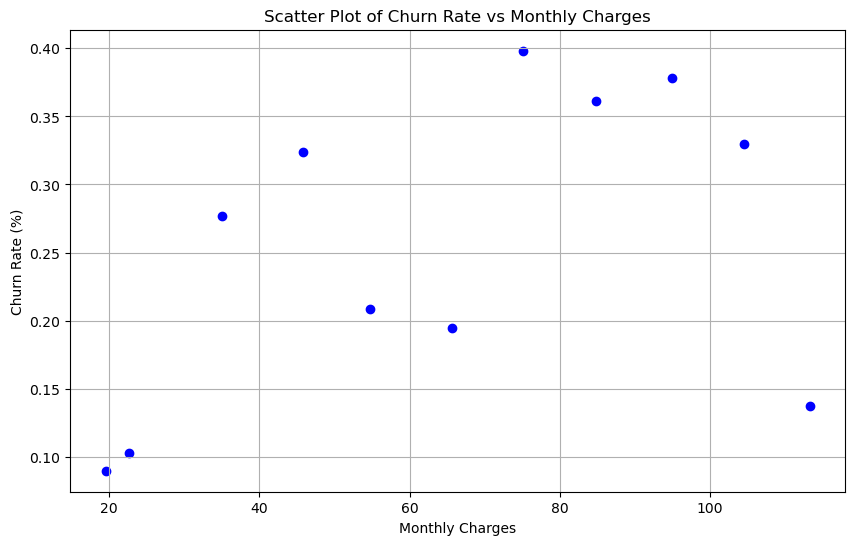

In [63]:
# Scatter plot for 'churn_numeric' vs 'MonthlyCharges'
plt.figure(figsize=(10, 6))
plt.scatter(average_bymonthlycharge_grouped_df['MonthlyCharges'],average_bymonthlycharge_grouped_df['churn_numeric'], color='blue')
plt.title('Scatter Plot of Churn Rate vs Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Churn Rate (%)')
plt.grid(True)
# Saving the figure. Specifing the desired file path and name.
plt.savefig('../Project-1/Output/fig17.png')

# Show the plot
plt.show()


The r-squared is: 0.2117943202385327


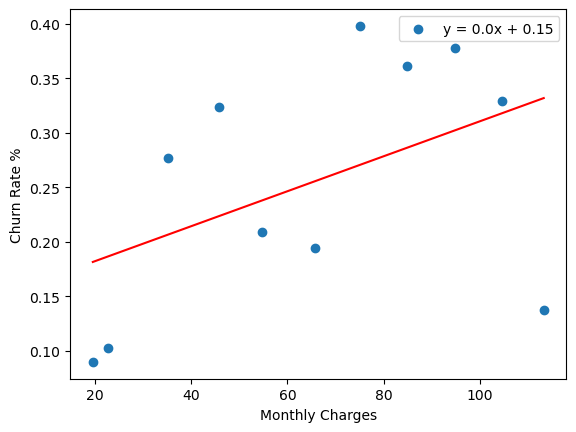

In [64]:
# Add the linear regression equation and line to plots
x_values = average_bymonthlycharge_grouped_df['MonthlyCharges']
y_values = average_bymonthlycharge_grouped_df['churn_numeric']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"  
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Monthly Charges')
plt.ylabel('Churn Rate %')
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")
plt.legend([line_eq], loc ="best")
print(f"The r-squared is: {rvalue**2}")

# Saving the figure. Specifing the desired file path and name.
plt.savefig('../Project-1/Output/fig18.png')

# Show the plot
plt.show()

In [65]:
# Calculating the correlation coefficient between 'MonthlyCharges' and 'Churn_numeric'
cor_MonCharge_churn = telco_data['MonthlyCharges'].corr(telco_data['churn_numeric'])
cor_MonCharge_churn

0.19335642223784671

## Analysis

- Based on the R-squared value of approximately 0.212 from the scatter plot and linear regression analysis, there is a moderate positive relationship between monthly charges and churn rate. As the monthly charges increase, the churn rate also tends to increase, suggesting higher prices may lead to higher churn. However, The linear regression model explains only about 21% of the variance in churn rate. This indicates that monthly charges are a factor in churn, but not the only or most significant one.
- The other 78.8% of the variation is due to other factors.
- Also, the correlation coefficient of approximately 0.193 for 'MonthlyCharges' and 'Churn_numeric' indicates a weak positive linear relationship between the two variables. This suggests that as monthly charges increase, there is a slightly higher likelihood of churn, although the relationship is not strong.

# Conclusion

- **With respect to "Monthly charges"**:
   There could be other factors influencing churn that are not included in the model. These might include customer service quality, contract terms, competitive offers, individual customer preferences, market conditions, and more. The dataset might not be representative of the broader population or might not capture enough historical context to adequately model the churn behavior in terms of monthly charges relationship with churn rate.
   While the R-squared value gives an indication of the strength of the relationship, it would also be important to consider the p-value associated with the regression analysis to understand whether the observed relationship is statistically significant.
- **With respect to Internet Services Categories:**
 One relevant factor here that may be affecting churn rate is, Fiber Optic which has the most churn rate,i.e, 42% which is 1297 counts of churns out of 3096 total Fiber optic customers, as shown in my analysis above. This rate suggests issues around fiber optic services driving churn, or customers getting fiber, expecting faster speeds but being disappointed.The provider could focus on improving fiber optic performance and customer satisfaction to reduce the high churn. Overall, internet service type seems correlated with likelihood to churn. Improving fiber optic satisfaction and analyzing the root causes of dissatisfaction among fiber optic customers could reveal ways to improve retention.**

- **With respect to Contract categories**:
  Another variable that is notably strong factor here is month-to-month contract. As shown in our analysis above,month-to-month contract has the highest churn rate. Approximately 42.71% of customers with a month-to-month contract have churned. Whereas customers with longer contracts (one year and two years) have significantly lower churn rates, with the two-year contract holders being the least likely to churn(2.83%).
  Highest month-to-month churn rate could reflect a lowest commitment level or satisfaction with the service.
Other reasons why month to month contract has the highest churn could be, such as unaffordability of services for longer period, end of promotions and trial periods, life changes etc.    
- **With respect to “Total Charges:”** The significant presence of outliers among churned customers suggests that while the median total charge is lower, several churned customers still have very high total charges. The absence of outliers in the retained customer box plot suggests a more uniform distribution of total charges without extreme values. Since churned customers have a more comprehensive range of total charges with outliers indicating some high values, the business might want to investigate why customers with high total charges are leaving and address those reasons to improve retention.
The more consistent range of total charges among retained customers could indicate that customers within a specific range of spending are more likely to stay, which could be a sign of stable usage patterns and satisfaction with the service among these customers, possibly because they find the services to be of good value or due to the costs associated with switching to another provider, or lack of a better alternative.
- **With Respect to “Senior Citizen”:** The churn rate is almost double for senior citizens versus non-seniors (41.68% >23.60%) even though seniors are only 16.2% of the total customers in the dataset. The smaller number of senior citizens in the dataset could mean we didn’t collect enough data from the senior citizen population. At the same time, their higher churning rate suggests that they may need additional retention efforts, special offers, or customized services to reduce their churn rate.

- In conclusion, different variables undoubtedly have **marginal effects on our variable “Churn”** . However, **it is crucial to acknowledge that the interactions between these variables can influence churn in reality.**

